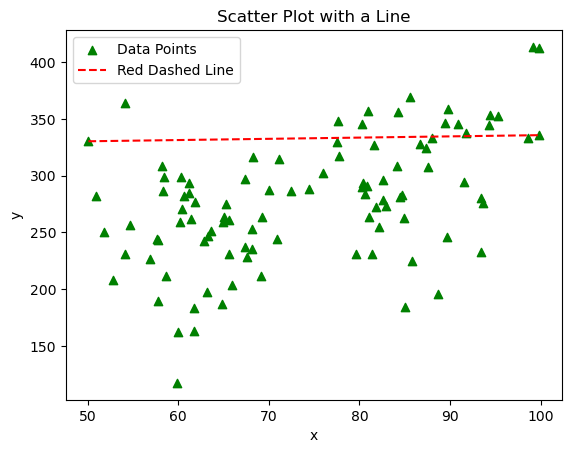

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv('scatter_data.csv', comment='%')
x = data.iloc[:,0]
y = data.iloc[:,1]
plt.scatter(x, y, color='green', marker='^', label='Data Points')
min_x = min(x)
max_x = max(x)
plt.plot([min_x, max_x], [y[x.idxmin()], y[x.idxmax()]], 'r--', label='Red Dashed Line')
plt.title('Scatter Plot with a Line')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


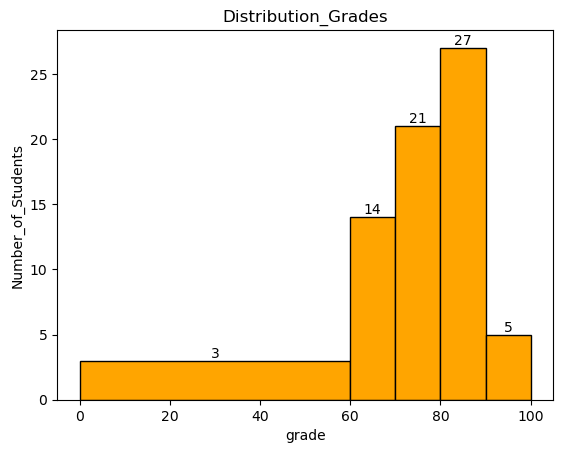

In [2]:
grades_data = pd.read_csv('student_grades.csv', comment='%')
scores = grades_data.iloc[:, 1]
bins = [0, 60, 70, 80, 90, 100]
counts, bins, patches = plt.hist(scores, bins=bins, edgecolor='black', color='orange', label='Counts')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count, str(int(count)), 
             ha='center', va='bottom')
plt.xlabel('grade')
plt.ylabel('Number_of_Students')
plt.title('Distribution_Grades')
plt.show()

In [43]:
data = pd.read_csv('solution_data.csv', comment='%')
optimal_values = data[data.iloc[:,1] == 'optimal']
data['Optimality Gap'] = data.apply(lambda row: 0 if row[1] == 'optimal'
                                    else 100 * (optimal_values.iloc[row[0] - 1] - row[2])
                                    / optimal_values.iloc[row[0] - 1], axis=1)
heuristic_data = data[data.iloc[:,1] != 'optimal']
avg_optimality_gaps = heuristic_data.groupby(1)['Optimality Gap'].mean().reset_index()
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
fig.suptitle('Comparison of Optimality Gaps for Heuristics')
avg_optimality_gaps.plot(kind='bar', x='Solution Approach', y='Optimality Gap',
                         ax=axes[0], color='orange', edgecolor='black', legend=False)
axes[0].set_title('Average Optimality Gap')
axes[0].set_xlabel('Heuristic')
axes[0].set_ylabel('Average Optimality Gap (%)')
heuristic_data.boxplot(column='Optimality Gap', by='Solution Approach', ax=axes[1], patch_artist=True,
                       boxprops=dict(facecolor='none', color='orange'),
                       medianprops=dict(color='orange'))
axes[1].set_title('Optimality Gap Distribution')
axes[1].set_xlabel('Heuristic')
axes[1].set_ylabel('')
plt.suptitle('') 
fig.subplots_adjust(top=0.85) 
y_max = max(heuristic_data['Optimality Gap'].max(), avg_optimality_gaps['Optimality Gap'].max()) + 10
axes[0].set_ylim(0, y_max)
axes[1].set_ylim(0, y_max)
plt.tight_layout()
plt.show()

TypeError: unsupported operand type(s) for -: 'str' and 'float'

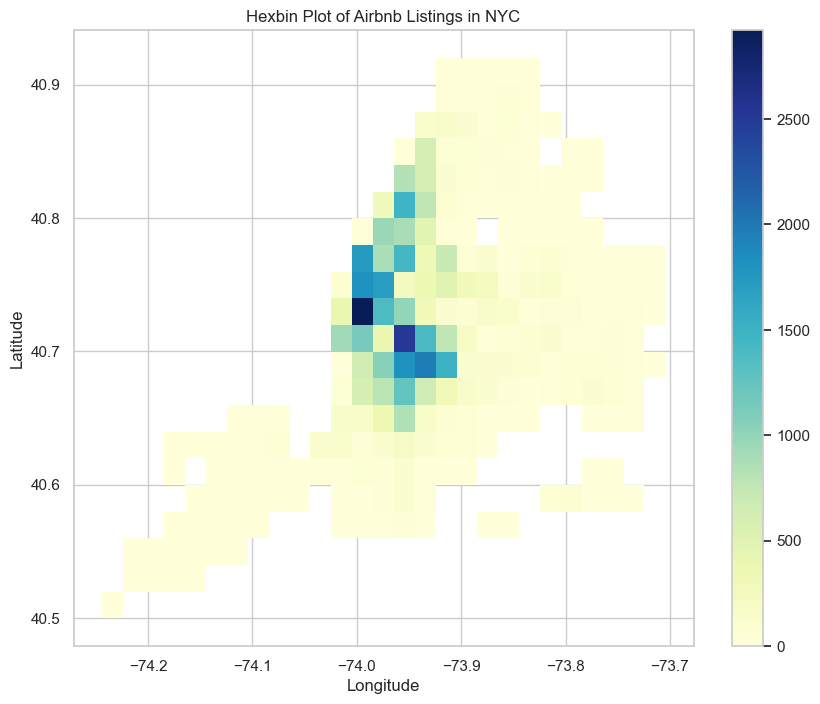

In [5]:
import seaborn as sns
data = pd.read_csv('AB_NYC_2019.csv')
plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")
sns.histplot(data=data, x="longitude", y="latitude", cbar=True, cmap="YlGnBu", binwidth=0.02)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Hexbin Plot of Airbnb Listings in NYC")
plt.show()


In [ ]:
#https://seaborn.pydata.org/examples/hexbin_marginals.html
#https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data
#Explanation:
#I'll create a hexbin plot to visualize the distribution of Airbnb listings in New York City. Specifically, I'll plot the latitude and longitude of the listings using hexagonal bins. This will allow us to see areas with high listing density more clearly.